# Dinâmica de Sistemas Mecânicos Utilizando Python
## Professor Paulo Victor
## Exemplo 1 - Sistema Massa-Mola

Na Figura 01, é mostrada uma representação do sistema massa-mola do Experimento 1. A variável $x$ representa o deslocamento do centro de massa em relação à posição da mola relaxada. Esta posição é aquela a qual, caso a velocidade instantãnea seja nula, o sistema  permanece em repouso, ou seja, o sistema permanece em equilíbrio estático. 

In [1]:
from IPython.core.display import SVG
SVG(filename='massa-mola.svg')

Utilizaremos os comandos as seguir para importar as bibliotecas que utilizaremos para a simulação. A sympy é uma biblioteca de matemática simbólica para python. O termo matemática simbólica refere-se ao uso de expressões literais, ou seja, são usadas letras ao invés de números. A sympy.physics.mechanincs fornece um conjunto de ferramentas para o estudo da dinâmica de sistemas mecânicos. Com essa biblioteca é possível obter as equações de movimento de sistemas mecânicos complexos. Neste exemplo, utilizar-se-á este conjunto de ferramentas em um problema relativamente simples, de modo que o seu uso não é necessário. No entanto, esta é uma boa oportunidade para introduzir estes comandos,tendo em vista que, por ser um exemplo bem conhecido, poder-se-á focar o aprendizado nos comandos

In [2]:
import sympy as sy
import sympy.physics.mechanics as me

Após importar as bibliotecas, será criado o símbolo dinâmico, ou seja,  símbolo que varia com o tempo. No nosso caso, este símbolo é a variável $x$, que representa o deslocamento do centro de massa em relação à posição de repouso. \
Criando uma varíavel dinâmica:

In [3]:
x = me.dynamicsymbols('x')

A seguir, serão criadas as constantes do problema, que são a constante de rigidez elástica da mola ($k$) e a massa do bloco ($m$). Além disso, será criada a constante $L$ para representar a distâcia do engaste ao centro de massa do bloco, quando este está na posição de equilíbrio estático.\
Criando constantes:

In [4]:
m,k,L = sy.symbols('m k L')

Neste exemplo será utilizada uma abordagem Newtoniana. Para se utilizar esta abordagem, é necessário se criar um Referencial Inercial. Associa-se a um Referencial Inercial um sistema de coordenadas ortonormal. Isto siginifica que se trata de um sistema de coordeadas composto por vetores unitário que são ortogonais entre si. Na Figura 02, é mostrado o sistema de referência $N$ criado, o qual é um referencial inercial. Fixa-se na origem deste sistema o ponto $O$. 


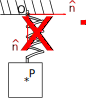

In [5]:
SVG(filename='massa-mola2.svg')

O comando me.ReferenceFrame() cria um sistema de referência.

In [6]:
N = me.ReferenceFrame('N') 

Após se criar o referencial inercial $N$, criar-se-á o ponto $O$ fixo na origem de $N$. Em seguida, define-se a velocidade do ponto $O$ no referencial N como sendo nula. Esta definição é necessária para que o programa entenda que o ponto $O$ está fixo em $N$. \
O comando me.Point('O') cria o ponto $O$. \
O comando O.set_vel(N,0) define que a velocidade do ponto $O$ no referencial $N$ é igual a $O$. 

In [7]:
O = me.Point('O') 
O.set_vel(N,0) 

A seguir, será criado o ponto $P$ e serão definidos a sua posição e a sua velocidade. O ponto $P$ está fixado no centro de massa do bloco, logo, como mostrado na Figura XX, sua posição em relação ao ponto $O$ é: $ L + X$ na direção $\mathbf{\hat{n_{x}}}$. 
O comando f.dt(N) deriva o vetor $\mathbf{f}$ no tempo em relação ao referencial $N$. Neste exemplo, este comando foi utilizado para derivar o vetor $(L + x)\mathbf{\hat{n_{x}}}$, logo, foi escrito da seguinte maneira: ((L+x)*N.x).dt(N). Desta forma, definiu-se a velocidade do ponto $P$ no referencial inercial $N$ como: $^N \mathbf{v}^{P} = \dfrac{d(L+x)\mathbf{\hat{n_{x}}}}{dt}$.

In [8]:
P = me.Point('P')
P.set_pos(O,(L + x)*N.x)
P.set_vel(N,((L+x)*N.x).dt(N))

Pode-se conferir a velocidade do ponto $P$ em relação a $N$ através do comando P.vel(N).

In [9]:
P.vel(N)

x'*N.x

De semelhante forma, a aceleração do ponto $P$ em $N$ é obtida por P.acc(N)

In [10]:
P.acc(N)

x''*N.x

Neste problema, como não há alteração na orientação do bloco, consideraremos que toda a massa do corpo está concentrada em seu centro de massa, ou seja, no ponto $P$. Desta forma, modelaremos o bloco como uma partícula. Cria-se uma partícula utilizando o comando me.Particle('Par',P,m), onde Par é o nome dado à partícula, P é o ponto referente à sua localização e m sua massa. 

In [11]:
Par = me.Particle('Par',P,m) 

O vetor Quantidade de Movimento Linear é definido como o produto da massa pela velocidade do centro de massa em um dado referencial. É possível obter o vetor Quantidade de Movimento Linear da partícula criada utilizando o comando Par.linear_momentum(N), onde Par é o nome da partícula que se deseja extrair essa informação e N é o sistema de referência a qual se deseja obter esse vetor. 

In [12]:
Par.linear_momentum(N)

m*x'*N.x

O comando abaixo apenas guarda o vetor Quantidade de Movimento Linear na variável G. 

In [13]:
G = Par.linear_momentum(N)

De acordo com a segunda lei de Newton, a resultante das forças que atuam em uma partícula é igual a derivada temporal do vetor Quantidade de Movimento Linear no referencial inercial. Na figura a seguir, é mostrada a força atuante no bloco de massa $m$ (diagrama de corpo livre). Observa-se que não se incluiu a força peso, porque quando o bloco está na posição de repouso, a mola está resistindo à força peso, de maneira que em sua posição relaxada, a força peso é anulada pela força da mola. 

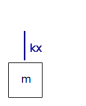

In [14]:
SVG(filename='massa-mola3.svg')

Logo, a resultante $\mathbf{F}$ das forças será $\mathbf{F} = -k x \mathbf{\hat{n_{x}}}$

In [15]:
F = -k*x*N.x

A Equação de Movimento vetorial é então escrita como:
$$ \mathbf{F} = \dfrac{d\mathbf{G}}{dt} $$
ou:
$$ \dfrac{d\mathbf{G}}{dt} - \mathbf{F} = 0 $$
O comando a seguir guarda essa Equação de Movimento vetorial na variável EqMov. Observa-se que se utilizou o comando G.dt(N) para realizar a derivada temporal do vetor Quantidade de Movimento Linear em relação ao referêncial inercial $N$.

In [16]:
EqMov = G.dt(N) - F

Pode-se visualizar a equação de movimento apenas digitando o nome da variável a qual ela está armazenada:

In [17]:
EqMov

(k*x + m*x'')*N.x

Conforme destacado anteriormente, foi obtida a equação de movimento na forma vertorial. De modo geral, é mais conveniente a sua utilização na forma escalar. Para isto, será efetuado o produto escalar desta equação com o vetor $\mathbf{\hat{n_{x}}}$, pois todos os compontentes dessa equação estão nesta direção. A variável EqMovX armazenará a equação de movimento projetada em $\mathbf{\hat{n_{x}}}$.

In [18]:
EqMovX = me.dot(EqMov,N.x)
EqMovX

k*x(t) + m*Derivative(x(t), (t, 2))

Observa-se que esta equação apresenta apenas os termos do lado direito da igualdade. Para se corrigir isto, utiliza-se o comando sy.Eq(EqMovX,0), onde a função deste comando é apenas igualar a variável EqMovX a 0. 

In [19]:
EQMOV = sy.Eq(EqMovX,0)
EQMOV

Eq(k*x(t) + m*Derivative(x(t), (t, 2)), 0)

$$m \ddot{x} + mx =0 $$
Para realizar a integração numérica utilizando Runge Kutta de $4^{a}$ ordem, transforma-se uma EDO de segunda ordem em um sistema de duas EDOs de primeira ordem:
$$  \dot{u} = - \dfrac{k}{m}x $$
$$ \dot{x} = u $$ 
Cria-se, então, uma nova variável dinâmica $u$. O comando EQMOV.subs((x.diff()).diff(),u.diff()) substitui $\ddot{x}$ por $\dot{u}$ na equação de movimento. O resultado desta substituição é visualizado ao se digitar o nome da variável em que esta informação foi armazenada, ou seja, digita-se EQMOV.

In [20]:
u = me.dynamicsymbols('u')
EQMOV = EQMOV.subs((x.diff()).diff(),u.diff())
EQMOV

Eq(k*x(t) + m*Derivative(u(t), t), 0)

Utiliza-se o comando sy.solve(EQMOV,u.diff()) para resolver a equação de movimento para $\dot{u}$, ou seja, isola-se a variável $\dot{u}$ no lado esquerdo da equação. Guarda-se esta informação em $up$. Ao se observar a informação armazenada na variável up recém criada, verifica-se que a informação estrá entre colchetes, isso significa que o comando sy.solve gerou como saída uma lista contendo um único elemento. 

In [21]:
up = sy.solve(EQMOV,u.diff())
up

[-k*x(t)/m]

Observa-se que até o presente momento a abordagem se deu forma completamente simbólica. No entanto, para se realizar a integração numéria, as contantes precisam ser substituidas por valores numéricos. Os próximos dois comandos atribuem valores numéricos ao coeficiente de rigidez elástica e à massa do bloco, os guardando nas variáveis kn e mn, respectivamente. 

In [22]:
kn,mn = 45,1

Para se inserir o valor numérico em up, utiliza-se o comando up[0].subs(k,kn). O termo [0] siginifica que estamos acessando o primeiro elemento da lista up. Esta nova equação com a substituição de um valor simbólico por um valor numérico é guardada em upn. A seguir é realizada a substiuição de m(simbólico) por mn(numérico).

In [23]:
parametros = [(k,kn),(m,mn)]
upn = up[0].subs(parametros)

A seguir, é imporada a biblioteca numérica de python, a numpy. Define-se os tempos iniciais e finais de simulação e o passo de integração. Observa-se que a posteriori o passo de integração deverá ser verificado com uma análise de convergência. Em seguida, é obtido o número de passos de integração é criado o vetor de tempo linearmente espaçado. Por fim, são definidas as condições iniciais de deslocamento e velocidade e são armazenadas no vetor x0 de condições iniciais.

In [24]:
import numpy as np
tn = 0 # tempo inicial
tf = 15 # tempo final
h = 0.01 # passo de integração
n = int(tf/h) # número de pontos

T = np.linspace(tn,tf,n)
xn = 0 # deslocamento inicial
vn = 2 # velocidade inicial
x0 = [xn,vn]

Para se realizar a integração numérica, torna-se necessária a criação de uma função que contenha as duas EDOs de primeira ordem referentes à dinâmica do modelo massa-mola:
$$ \dot{x} = u $$ 
$$  \dot{u} = - \dfrac{k}{m}x $$
Observa-se que X é a matriz que conterá as respostas, em que na primeira coluna estarão os delocamentos instantâneos e na segunda coluna as velocidades instantâneas. 

In [25]:
def modelo(X,T): #X[0] é o deslocamento e X[1] é a velocidade
    dx_dt = X[1]
    aa = upn.subs(x,X[0])
    dv_dt = (aa.evalf())
    return [dx_dt,dv_dt]

O último passo é a integração numérica em si. Realiza-se a integração importando a biblioteca scipy.integrate e utilizando a função odeint.

In [26]:
from scipy.integrate import odeint

X = odeint(modelo,x0,T)

Por fim, para se visualizar graficamente os resultados simulados, é importada a bilbioteca matplotlib.pyplot. Os comandos seguintes nesse mesmo bloco apenas configuram o tamanho janela de visualização.

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['figure.dpi']=150

O comando plt.figure() cria uma nova figura em branco. Para se plotar os valores de X por T, basta utilizar plt.plot(T,X). Os demais comandos inserem os nomes dos eixos x e y do gráfico plotado, o título do gráfico e cria uma grade para melhor visualização. 

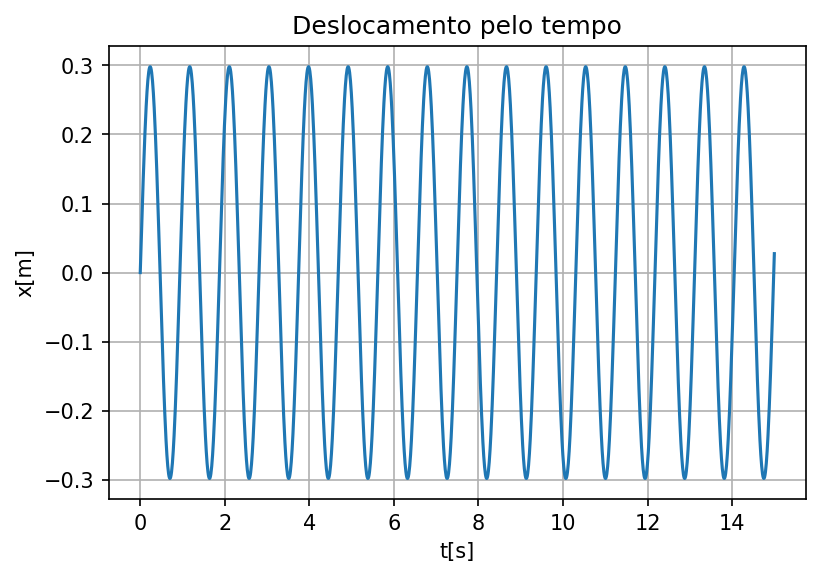

In [28]:
plt.figure()
plt.plot(T,X[:,0])
plt.xlabel('t[s]')
plt.ylabel('x[m]')
plt.title('Deslocamento pelo tempo')
plt.grid(True)

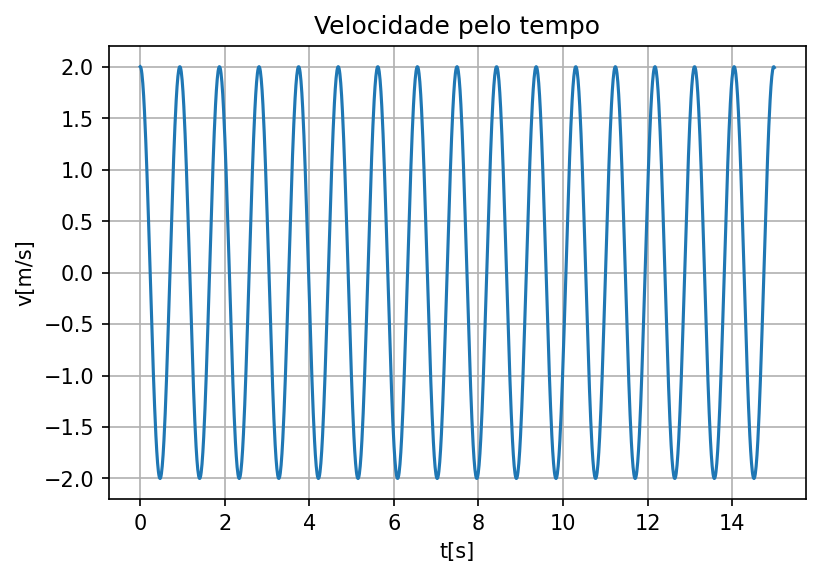

In [29]:
plt.figure()
plt.plot(T,X[:,1])
plt.xlabel('t[s]')
plt.ylabel('v[m/s]')
plt.title('Velocidade pelo tempo')
plt.grid(True)

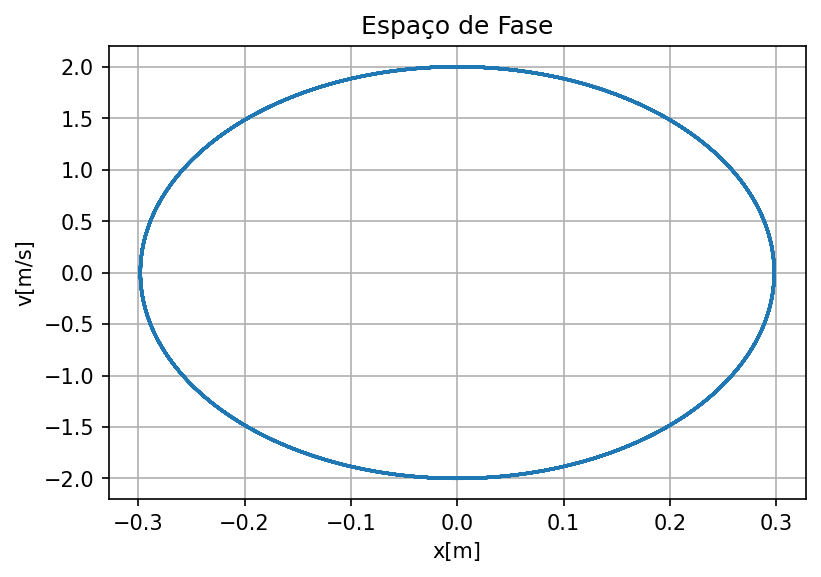

In [30]:
plt.figure()
plt.plot(X[:,0],X[:,1])
plt.xlabel('x[m]')
plt.ylabel('v[m/s]')
plt.title('Espaço de Fase')
plt.grid(True)